In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
tickers = ['RELIANCE.NS', 'INFY.NS', 'ICICIBANK.NS']
data = yf.download(tickers, start='2020-01-01', end='2025-05-31', interval='1mo')['Close']
returns = data.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed


In [ ]:
returns

Ticker      ICICIBANK.NS   INFY.NS  RELIANCE.NS
Date                                           
2020-02-01     -0.054028 -0.057027    -0.058797
2020-03-01     -0.348919 -0.123274    -0.161743
2020-04-01      0.174208  0.115355     0.316274
2020-05-01     -0.126792 -0.034242     0.008377
2020-06-01      0.058744  0.079548     0.163685
...                  ...       ...          ...
2025-01-01     -0.022510 -0.000106     0.040849
2025-02-01     -0.038873 -0.102192    -0.051379
2025-03-01      0.119799 -0.069355     0.062495
2025-04-01      0.058331 -0.044918     0.101874
2025-05-01      0.013175  0.041731     0.011317

[64 rows x 3 columns]

In [ ]:
data

Ticker      ICICIBANK.NS      INFY.NS  RELIANCE.NS
Date                                              
2020-01-01    508.124115   686.630249   638.314453
2020-02-01    480.670990   647.473877   600.783752
2020-03-01    312.955719   567.656860   503.611176
2020-04-01    367.475250   633.138672   662.890198
2020-05-01    320.882355   611.458862   668.443420
...                  ...          ...          ...
2025-01-01   1252.800049  1853.718018  1265.099976
2025-02-01   1204.099976  1664.283325  1200.099976
2025-03-01   1348.349976  1548.857422  1275.099976
2025-04-01   1427.000000  1479.286255  1405.000000
2025-05-01   1445.800049  1541.017700  1420.900024

[65 rows x 3 columns]

In [ ]:
expected_return = returns.mean()
std_deviation = returns.std()
cov_matrix = returns.cov()

In [ ]:
key_metrics = pd.DataFrame({'Expexcted_Return' : expected_return,
                            'Std_Deviations' : std_deviation})

In [ ]:
key_metrics

Expexcted_Return  Std_Deviations
Ticker                                        
ICICIBANK.NS          0.020079        0.082719
INFY.NS               0.015878        0.081686
RELIANCE.NS           0.015526        0.079517

In [ ]:
cov_matrix

Ticker        ICICIBANK.NS   INFY.NS  RELIANCE.NS
Ticker                                           
ICICIBANK.NS      0.006842  0.001274     0.002666
INFY.NS           0.001274  0.006673     0.002598
RELIANCE.NS       0.002666  0.002598     0.006323

In [ ]:
weights_list = [
    [0.33, 0.33, 0.34],
    [0.5, 0.25, 0.25],
    [0.2, 0.5, 0.3],
    [0.6, 0.2, 0.2],
    [0.1, 0.4, 0.5]
]

In [ ]:
risk_free_rate = 0.005

portfolio_data = []

for weights in weights_list:
    weights = np.array(weights)

    port_return = np.dot(weights, expected_return)

    port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    port_std_dev = np.sqrt(port_variance)

    sharpe_ratio = (port_return - risk_free_rate) / port_std_dev

    portfolio_data.append({
        'Weights': weights,
        'Expected Return': port_return,
        'Std Deviation': port_std_dev,
        'Sharpe Ratio': sharpe_ratio
    })

In [ ]:
portfolio_data

[{'Weights': array([0.33, 0.33, 0.34]),
  'Expected Return': np.float64(0.017144791549709465),
  'Std Deviation': np.float64(0.06051119802066869),
  'Sharpe Ratio': np.float64(0.20070320778579184)},
 {'Weights': array([0.5 , 0.25, 0.25]),
  'Expected Return': np.float64(0.01789063787489546),
  'Std Deviation': np.float64(0.06190920670941146),
  'Sharpe Ratio': np.float64(0.2082184308288967)},
 {'Weights': array([0.2, 0.5, 0.3]),
  'Expected Return': np.float64(0.016612733163155376),
  'Std Deviation': np.float64(0.06217052243081349),
  'Sharpe Ratio': np.float64(0.18678841208192537)},
 {'Weights': array([0.6, 0.2, 0.2]),
  'Expected Return': np.float64(0.01832833601585384),
  'Std Deviation': np.float64(0.06431718339271283),
  'Sharpe Ratio': np.float64(0.20722822911060412)},
 {'Weights': array([0.1, 0.4, 0.5]),
  'Expected Return': np.float64(0.016122250455494418),
  'Std Deviation': np.float64(0.06422324581836873),
  'Sharpe Ratio': np.float64(0.173181070401666)}]

In [ ]:
portfolio_df = pd.DataFrame(portfolio_data)
portfolio_df

Weights  Expected Return  Std Deviation  Sharpe Ratio
0  [0.33, 0.33, 0.34]         0.017145       0.060511      0.200703
1   [0.5, 0.25, 0.25]         0.017891       0.061909      0.208218
2     [0.2, 0.5, 0.3]         0.016613       0.062171      0.186788
3     [0.6, 0.2, 0.2]         0.018328       0.064317      0.207228
4     [0.1, 0.4, 0.5]         0.016122       0.064223      0.173181

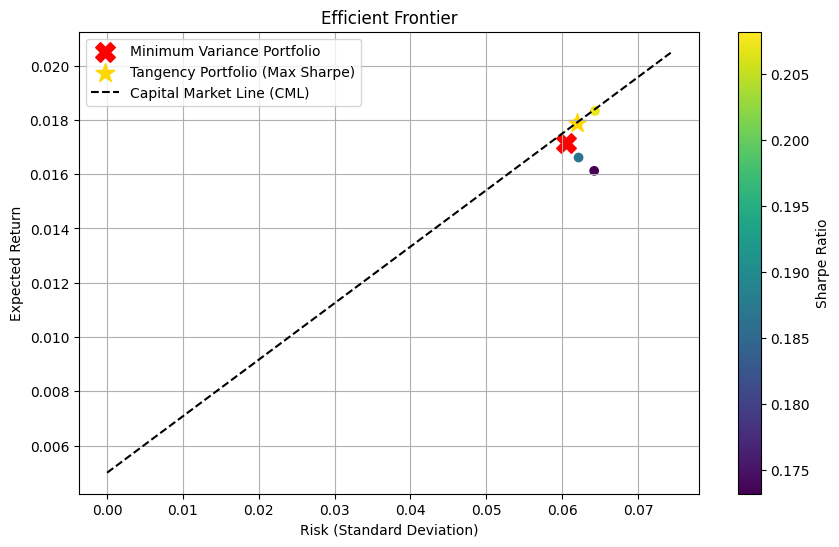

In [ ]:
min_var_idx = portfolio_df['Std Deviation'].idxmin()
tangency_idx = portfolio_df['Sharpe Ratio'].idxmax()

min_var_port = portfolio_df.loc[min_var_idx]
tangency_port = portfolio_df.loc[tangency_idx]

plt.figure(figsize=(10, 6))
plt.scatter(portfolio_df['Std Deviation'], portfolio_df['Expected Return'], c=portfolio_df['Sharpe Ratio'], cmap='viridis', marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

plt.scatter(min_var_port['Std Deviation'], min_var_port['Expected Return'], color='red', marker='X', s=200, label='Minimum Variance Portfolio')

plt.scatter(tangency_port['Std Deviation'], tangency_port['Expected Return'], color='gold', marker='*', s=200, label='Tangency Portfolio (Max Sharpe)')

risk_free_rate = 0.005
x = np.linspace(0, max(portfolio_df['Std Deviation'])+0.01, 100)
slope = tangency_port['Sharpe Ratio']
cml = risk_free_rate + slope * x
plt.plot(x, cml, label='Capital Market Line (CML)', color='black', linestyle='--')

plt.legend()
plt.grid(True)
plt.show()
